<a href="https://colab.research.google.com/github/Mainabryan/100-days-challenge-for-machine-learning-practise/blob/main/Copy_of_Credit_Card_Clustering(Machine_learning_).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LOAD THE DATASET

In [1]:
import pandas as pd
data = pd.read_csv("/content/Credit_card_dataset.csv")

#Import the necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

#EXPLATORY DATA ANALYSIS

In [3]:
data.head()

,CUST_ID,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
0,C10001,0.818182,95.40,201.802084,1000.0,0.000000
1,C10002,0.909091,0.00,4103.032597,7000.0,6442.945483
2,C10003,1.000000,773.17,622.066742,7500.0,0.000000
3,C10004,0.636364,1499.00,0.000000,7500.0,205.788017
4,C10005,1.000000,16.00,678.334763,1200.0,0.000000


In [4]:
data.tail()

,CUST_ID,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
8945,C19186,1.000000,291.12,325.594462,1000.0,0.000000
8946,C19187,1.000000,300.00,275.861322,1000.0,0.000000
8947,C19188,0.833333,144.40,81.270775,1000.0,0.000000
8948,C19189,0.833333,0.00,52.549959,500.0,36.558778
8949,C19190,0.666667,1093.25,63.165404,1200.0,127.040008


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CUST_ID            8950 non-null   object 
 1   BALANCE_FREQUENCY  8950 non-null   float64
 2   PURCHASES          8950 non-null   float64
 3   PAYMENTS           8950 non-null   float64
 4   CREDIT_LIMIT       8949 non-null   float64
 5   CASH_ADVANCE       8950 non-null   float64
dtypes: float64(5), object(1)
memory usage: 419.7+ KB


In [6]:
data.describe(include = 'all')

,CUST_ID,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
count,8950,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000
unique,8950,NaN,NaN,NaN,NaN,NaN
top,C19190,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.877271,1003.204834,1733.143852,4494.449450,978.871112
std,NaN,0.236904,2136.634782,2895.063757,3638.815725,2097.163877
min,NaN,0.000000,0.000000,0.000000,50.000000,0.000000
25%,NaN,0.888889,39.635000,383.276166,1600.000000,0.000000
50%,NaN,1.000000,361.280000,856.901546,3000.000000,0.000000
75%,NaN,1.000000,1110.130000,1901.134317,6500.000000,1113.821139


In [7]:
data.isnull().sum()

,0
CUST_ID,0
BALANCE_FREQUENCY,0
PURCHASES,0
PAYMENTS,0
CREDIT_LIMIT,1
CASH_ADVANCE,0


In [8]:
#Drop the missing rows
data = data.dropna(subset=['CREDIT_LIMIT'])


In [9]:
data.head()

,CUST_ID,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
0,C10001,0.818182,95.40,201.802084,1000.0,0.000000
1,C10002,0.909091,0.00,4103.032597,7000.0,6442.945483
2,C10003,1.000000,773.17,622.066742,7500.0,0.000000
3,C10004,0.636364,1499.00,0.000000,7500.0,205.788017
4,C10005,1.000000,16.00,678.334763,1200.0,0.000000


## DATA PREPROCESSING

##OUTLIERS

In [10]:
data.columns

Index(['CUST_ID', 'BALANCE_FREQUENCY', 'PURCHASES', 'PAYMENTS', 'CREDIT_LIMIT',
       'CASH_ADVANCE'],
      dtype='object')

#Detecting outliers

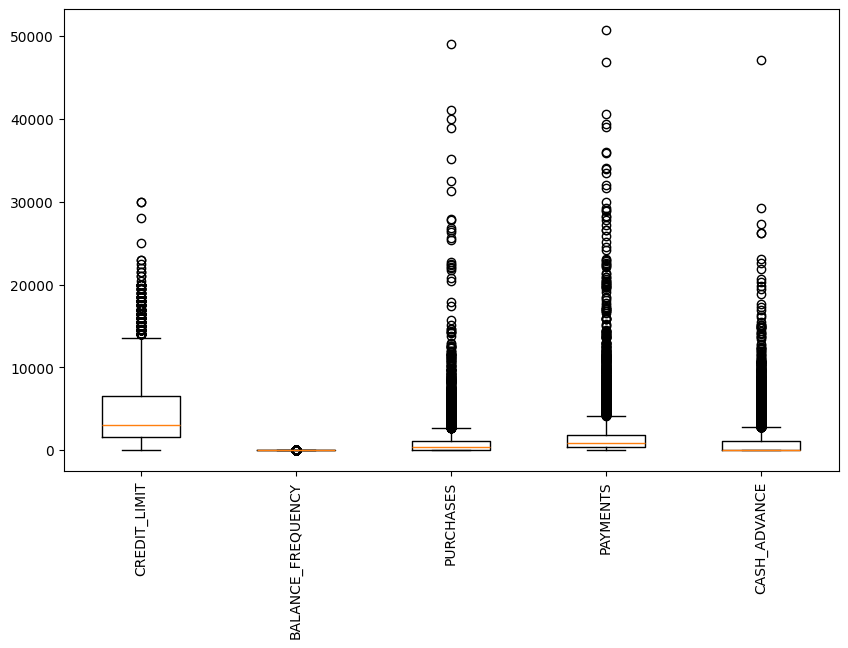

In [11]:
features=['CREDIT_LIMIT', 'BALANCE_FREQUENCY', 'PURCHASES', 'PAYMENTS', 'CASH_ADVANCE']
plt.figure(figsize=(10, 6))
plt.boxplot(data[features])
plt.xticks(range(1, len(features) + 1), features, rotation=90)

plt.show()

#HANDLING OUTLIERS

In [12]:
def remove_outliers_iqr(data, columns):
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    return data


In [13]:
data = data.drop('CUST_ID', axis=1)


## MODELLING

#Hierarchial clustering

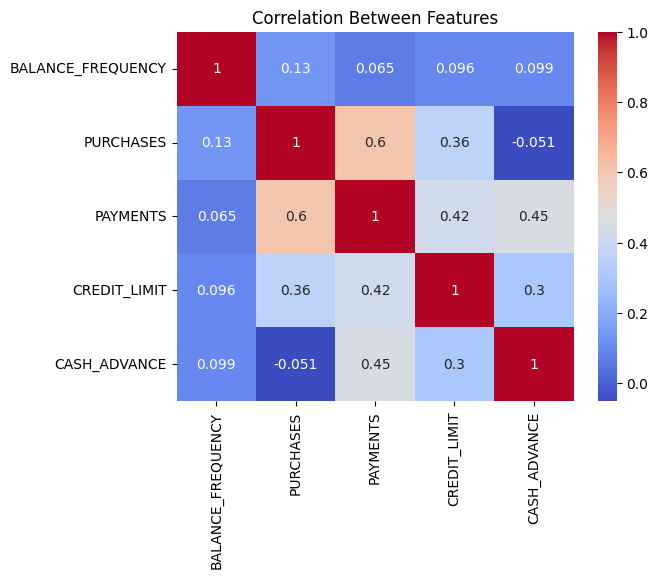

In [14]:
## WHEN PIVKING THE FEATURES YOOU SHOULD RUN VISUALIZATION CHECK AND PIC THPSE THAT DONT HAVE CORRRELATED FEATURES
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Features")
plt.show()


#Select two features

In [15]:
selected_features=data[['PURCHASES','CASH_ADVANCE']]

# SCALE THE SELECTED FEATURES

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(selected_features)

# AGGLOMARATIVE CLUSTERING

In [17]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=3)
cluster_labels = model.fit_predict(scaled_features)


#Cluster label to the data

In [18]:
selected_features['Cluster'] = cluster_labels

/tmp/ipython-input-18-2508034300.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_features['Cluster'] = cluster_labels


In [19]:
selected_features.loc[:, 'Cluster'] = cluster_labels


# Visualize

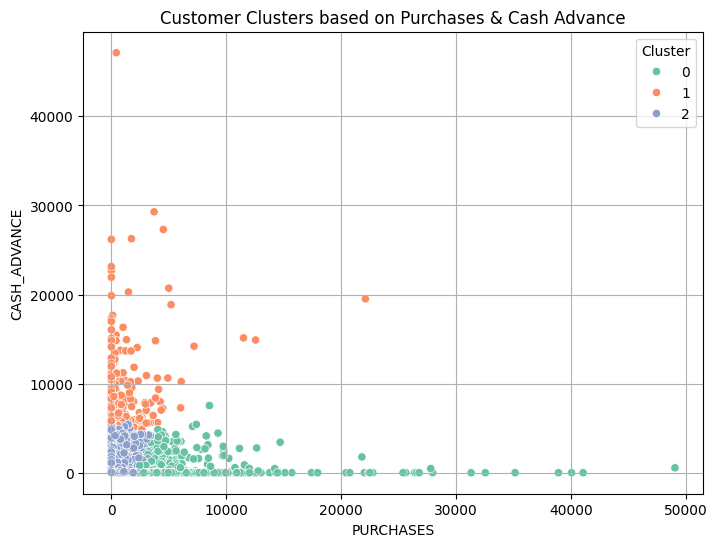

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(data=selected_features, x='PURCHASES', y='CASH_ADVANCE', hue='Cluster', palette='Set2')
plt.title('Customer Clusters based on Purchases & Cash Advance')
plt.grid(True)
plt.show()


#Dendogram

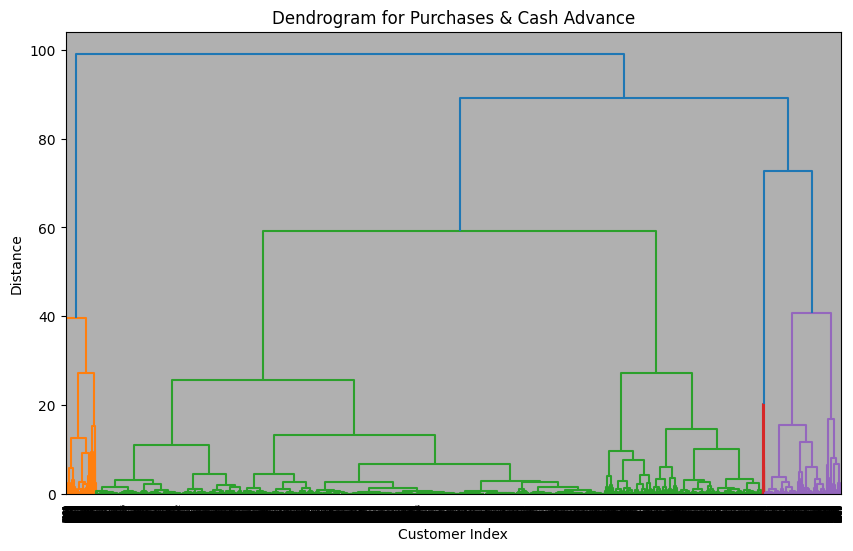

In [21]:
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(scaled_features, method='ward')
plt.figure(figsize=(10, 6))
dendrogram(linked)
plt.title('Dendrogram for Purchases & Cash Advance')
plt.xlabel('Customer Index')
plt.ylabel('Distance')
plt.grid(True)
plt.show()


#K-PLOT(PARTIIAL CLUSTRING)

In [22]:
kmeans=KMeans(n_clusters=3,random_state=42)
kmeans.fit(scaled_features)

KMeans(n_clusters=3, random_state=42)

#Add cluster labels

In [23]:
selected_features = selected_features.copy()  # avoid SettingWithCopyWarning
selected_features['Cluster'] = cluster_labels


##Plot the Clusters

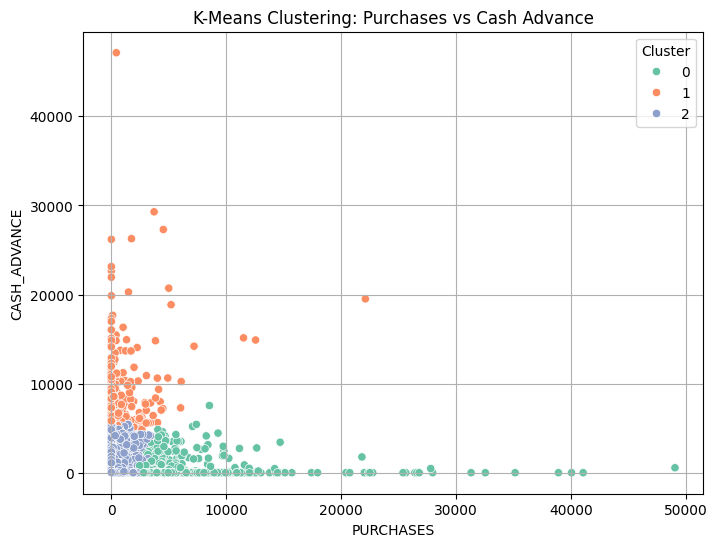

In [24]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=selected_features, x='PURCHASES', y='CASH_ADVANCE', hue='Cluster', palette='Set2')
plt.title('K-Means Clustering: Purchases vs Cash Advance')
plt.grid(True)
plt.show()


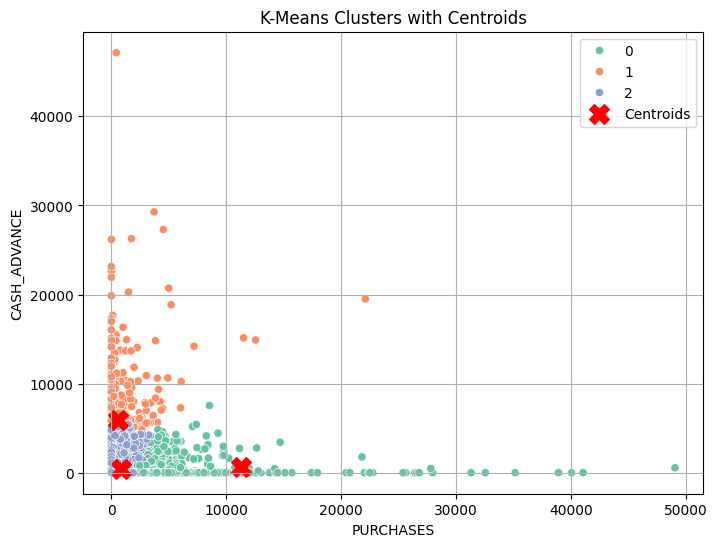

In [25]:
# Get the centroids in original scale
centroids = scaler.inverse_transform(kmeans.cluster_centers_)

plt.figure(figsize=(8, 6))
sns.scatterplot(data=selected_features, x='PURCHASES', y='CASH_ADVANCE', hue='Cluster', palette='Set2')
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title('K-Means Clusters with Centroids')
plt.legend()
plt.grid(True)
plt.show()


# find the k value and plot the clusters

In [26]:
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)



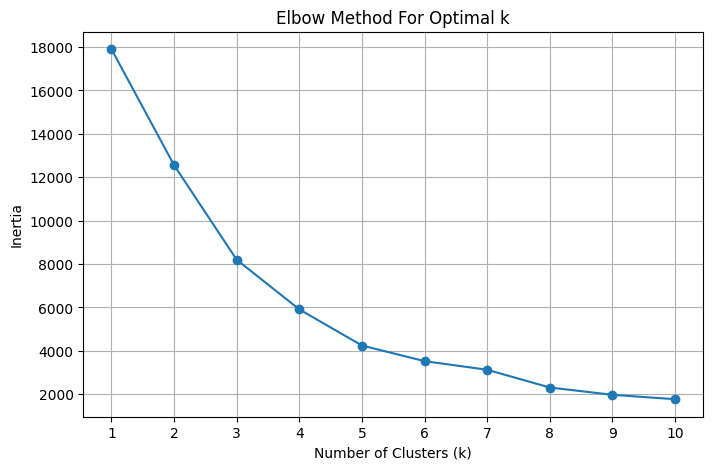

In [27]:
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(K_range)
plt.grid(True)
plt.show()

## What distinct customer segments emerge based on their spending patterns?

In [28]:
spending_data = data[['PURCHASES', 'CASH_ADVANCE', 'PAYMENTS']]


In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_spending = scaler.fit_transform(spending_data)


In [30]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
spending_clusters = kmeans.fit_predict(scaled_spending)

spending_data = spending_data.copy()
spending_data['Cluster'] = spending_clusters


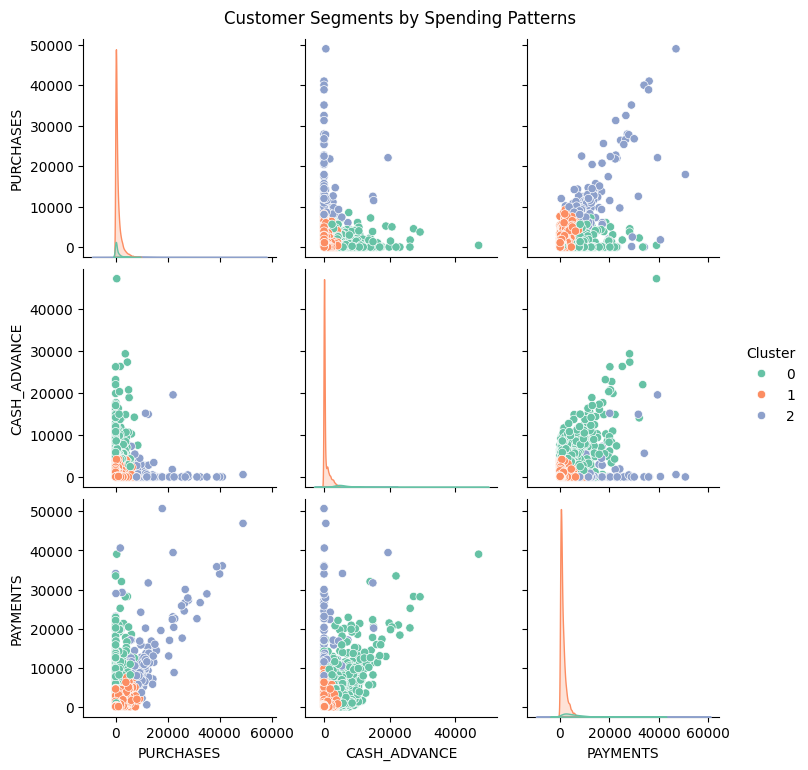

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(spending_data, hue='Cluster', palette='Set2')
plt.suptitle('Customer Segments by Spending Patterns', y=1.02)
plt.show()


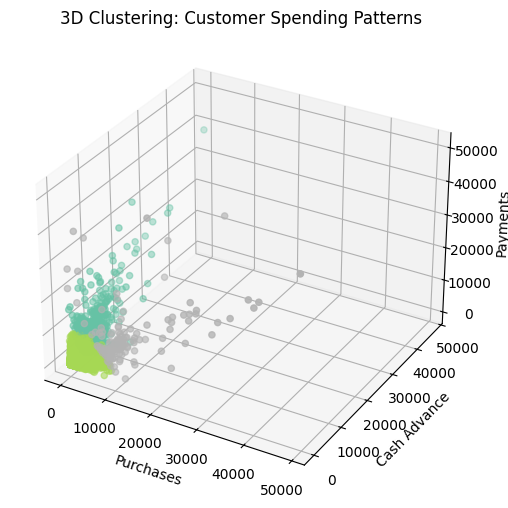

In [32]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(spending_data['PURCHASES'], spending_data['CASH_ADVANCE'], spending_data['PAYMENTS'],
           c=spending_data['Cluster'], cmap='Set2')
ax.set_xlabel('Purchases')
ax.set_ylabel('Cash Advance')
ax.set_zlabel('Payments')
plt.title('3D Clustering: Customer Spending Patterns')
plt.show()
